['../dist/endnodes/endnodesLocs-100-0.json']
Number of nodes in G: 325


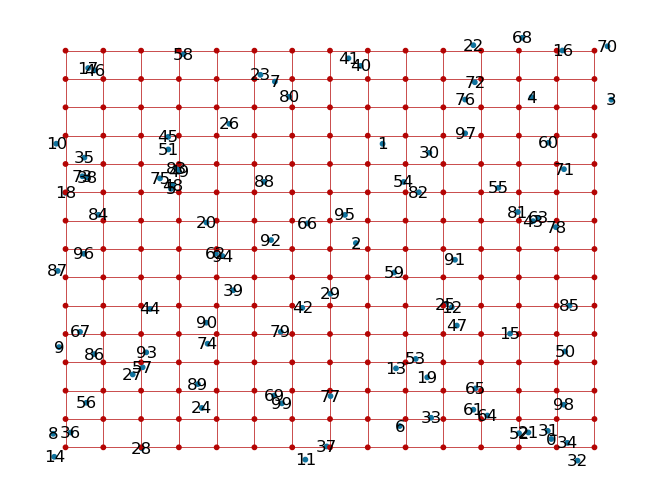

New reapters number: 225
max edge distance: 66.66666666666674
max endnode-repeater edge: 0
max repeater-repeater edge: 66.66666666666674
Distance Sum: 28000.000000000153
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


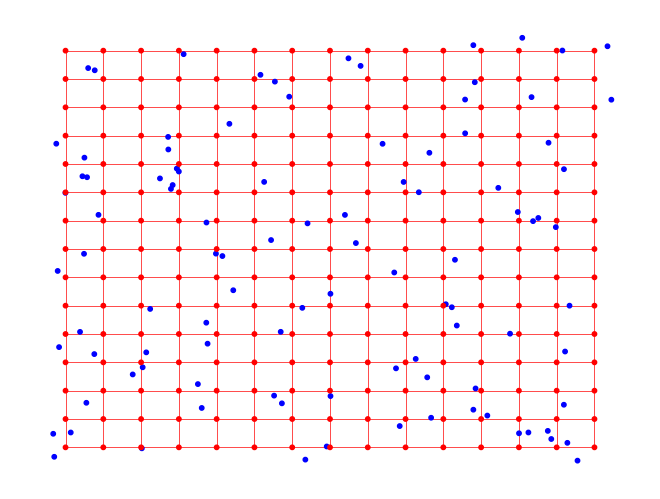

New reapters number: 211
max edge distance: 66.66666666666674
max endnode-repeater edge: 0
max repeater-repeater edge: 66.66666666666674
Distance Sum: 26133.333333333452
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


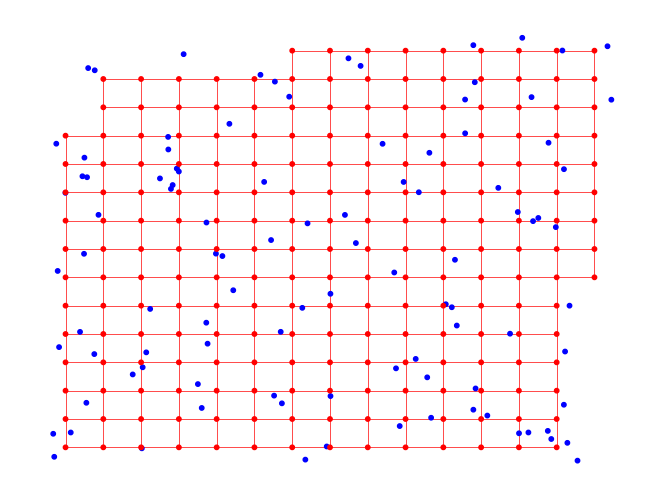

number of nodes in the graph: 311


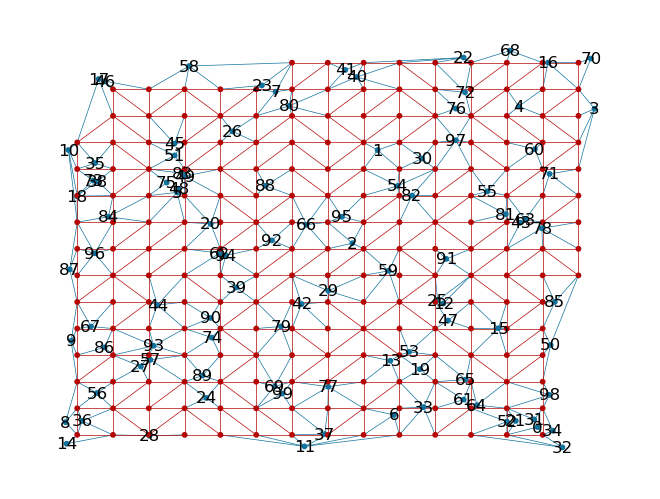

KeyboardInterrupt: 

In [1]:
from endnodes_gen import endnode_graph_gen, endnode_graph_gen_different_map_size
from iter_kms_ga import KmsGa
from grid_steiner import construct_steiner_tree
from waxman_topo_gen import construct_waxman
from demand_gen import Demand
import os
topo_num = 1
endnode_nums = [25]#, 25], 50, 200, 400, 800]
endnodes_files = []

# for i in range(topo_num):
#     for endnode_num in endnode_nums:
#         f = endnode_graph_gen(endnode_num, i)
#         endnodes_files.append(f)
# endnodes_files.append("../dist/endnodes/endnodesLocs-100-0.json")
from config import map_size
endnode_graph_gen_different_map_size(100, 0, map_size)
file_name = "us-top100.json"
# endnodes_files.append("../dist/endnodes/us-top100.json")
endnodes_files.append("../dist/endnodes/endnodesLocs-100-0.json")


# endnodes_files = [f for f in os.listdir("../dist/endnodes/")]# if os.path.isfile(f)]
# endnodes_files = ["../dist/endnodes/" + f for f in endnodes_files]

print (endnodes_files)

for f in endnodes_files:
    d = Demand(f, 300)
    # construct_steiner_tree(f)
    # print ("steiner tree generated for " + f)
    kms = KmsGa(d)
    kms.iterate_kms_ga(f)
    # print ("kms ga generated")
    # construct_waxman(f, degree=5, edge_len=1000)  
    # print ("waxman graph generated for " + f)

Number of nodes in G: 233


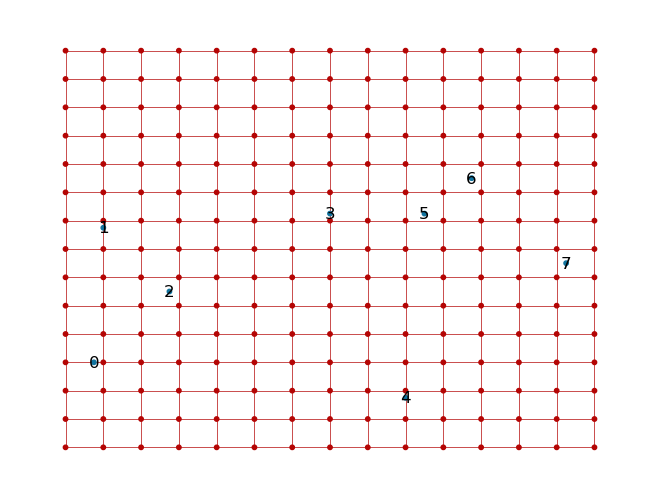

[25, 70]
[30, 165]
[65, 120]
[150, 175]
[190, 45]
[200, 175]
[225, 200]
[275, 140]


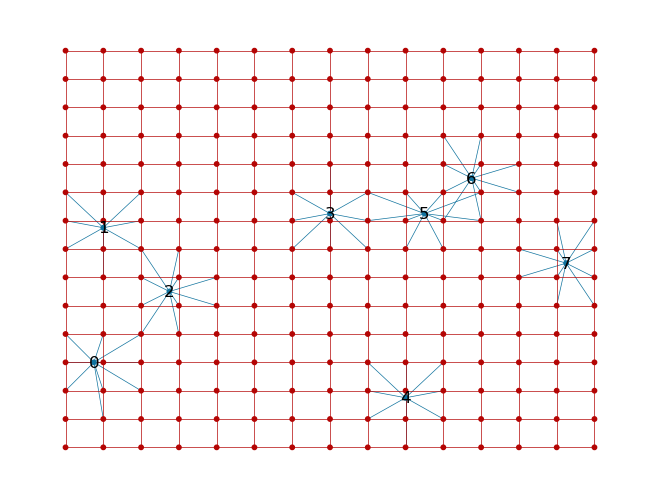

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import numpy as np

import networkx as nx
import random
import json
# A function to create a 2D map with size map_size * map_size
def endnode_graph_gen(n, topoIdx):

    seed = 8848 + topoIdx
    random.seed(seed)
    G = nx.Graph()
    # Randomly generate n nodes with 2D coordinates, and add them to the graph
    for i in range(n):
        #num_qubits = random.randint(1, 10)
        G.add_node(i, pos=(map_size * random.random(), map_size * random.random()), type='endnode', num_qubits=random.randint(10, 30))

    dirPath = './dist/endnodes/'
    fileName = 'endnodesLocs-' + str(n) + '-' + str(topoIdx) + '.json'
    with open(dirPath + fileName, 'w') as file:
        json.dump(nx.node_link_data(G), file)

    file.close()

    return dirPath + fileName


# A function to create a 2D map with size map_size * map_size
def endnode_graph_gen_different_map_size(n, topoIdx, map_size):

    seed = 8848 + topoIdx
    random.seed(seed)
    G = nx.Graph()
    # Randomly generate n nodes with 2D coordinates, and add them to the graph
    for i in range(n):
        #num_qubits = random.randint(1, 10)
        G.add_node(i, pos=(map_size * random.random(), map_size * random.random()), type='endnode', num_qubits=random.randint(10, 30))

    dirPath = '../dist/endnodes/'
    fileName = 'endnodesLocs-' + str(map_size) + '-' + str(n) + '-' + str(topoIdx) + '.json'
    with open(dirPath + fileName, 'w') as file:
        json.dump(nx.node_link_data(G), file)

    file.close()

    return dirPath + fileName

def solve_yuhang_1( L_max, N_max, D, K, alpha):
    map_size = 300  # 1000
    grid_size = 15  # 15
    step_size = map_size / grid_size
    l_rr = 200  # step_size * 4
    l_er = 200  # step_size * 3

    max_single_dis = 150  # step_size * 3

    unit_fiber_cost = 1
    unit_repeater_cost = 1000

    link_failure_rate = [0.01, 0.02, 0.04, 0.08, 0.1]

    c_fiber = 200000.0
    # color_map = {'endnode': 'blue', 'repeater': 'gold'}
    color_map = {'end_node': '#10739E', 'repeater': '#B40504'}
    def graph_plot(G):

        # draw the graph
        pos = nx.get_node_attributes(G, 'pos')
        node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes()]
        edge_colors = [color_map[G.edges[e]['type']] for e in G.edges()]
        num_endnodes = len([n for n in G.nodes() if G.nodes[n]['type'] == 'end_node'])
        # only get labels for node which type is repeater

        # labels_qubits = {n: G.nodes[n]['num_qubits'] for n in G.nodes() if G.nodes[n]['type'] == 'repeater'}
        labels_id = {n: n for n in G.nodes()}
        # nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10, labels=labels_qubits)
        # nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10)
        label_endnodes = {n: n for n in G.nodes() if G.nodes[n]['type'] == 'end_node'}
        nx.draw(G, pos, with_labels=True, labels=label_endnodes, node_color=node_colors, edge_color=edge_colors,
                width=0.5, node_size=10)
        plt.show()
        # Pause the program until the plot is closed
        # plt.savefig('graph.png')

    def read_endnodes_init_grid_graph_with_grid_edges(endnodes_graph_file):
        # Remove all edges
        # grid.remove_edges_from(G.edges())
        # Add all edges if the distance between two nodes is less than l_rr
        # Add all edges if the distance between two nodes is less than l_rr
        grid = nx.grid_2d_graph(grid_size, grid_size)

        # for node1 in grid.nodes:
        #     for node2 in grid.nodes:
        #         if node1 != node2:
        #             if math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2) < l_rr:
        #                 grid.add_edge(node1, node2)

        # Calculate the intersection points' 2-D position in a map_sz x map_sz map

        intersection_points = []
        for node in grid.nodes:
            x = (node[0] + 0.5) * step_size
            y = (node[1] + 0.5) * step_size
            intersection_points.append((x, y))

        # print(intersection_points)

        # Add nodes to the graph
        for node, pos in zip(grid.nodes, intersection_points):
            grid.nodes[node]['pos'] = pos
            grid.nodes[node]['xcoord'] = pos[0]
            grid.nodes[node]['ycoord'] = pos[1]
            grid.nodes[node]['type'] = 'repeater'

        G = nx.Graph()

        with open(endnodes_graph_file, 'r') as f:
            endnodes_graph = json.load(f)
            nodes = endnodes_graph['nodes']

        for node in nodes:
            if node['type'] == 'endnode':
                pos = node['pos']

                num_qubits = node['num_qubits']
                G.add_node(node['id'], pos=pos, num_qubits=num_qubits, type='end_node', xcoord = pos[0], ycoord =pos[1])
        endnodes = [node for node in G.nodes if G.nodes[node]['type'] == 'end_node']

        grid_G_node_mappling = {}
        # Add repeaters to G
        id_r = len(endnodes)
        for node, pos in zip(grid.nodes, intersection_points):
            grid_G_node_mappling[node] = id_r
            G.add_node(id_r, pos=pos, type='repeater', xcoord = pos[0], ycoord =pos[1])
            id_r += 1

        # Add edges between repeaters in G to form a grid
        for edges in grid.edges:
            dis = ((grid.nodes[edges[0]]['pos'][0] - grid.nodes[edges[1]]['pos'][0]) ** 2 + (
                    grid.nodes[edges[0]]['pos'][1] - grid.nodes[edges[1]]['pos'][1]) ** 2) ** 0.5
            G.add_edge(grid_G_node_mappling[edges[0]], grid_G_node_mappling[edges[1]], type='repeater', dis=dis)

        print(f'Number of nodes in G: {len(G.nodes)}')
        graph_plot(G)

        # Connect endnodes to repeaters if the distance is less than l_er
        repeaters = [node for node in G.nodes if G.nodes[node]['type'] == 'repeater']

        # Return the graph and the endnodes
        return G, endnodes

    def euclidean_distance(pos1, pos2):
        return np.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)

    def get_nearest_neighbors(graph, node, n_neighbors=10):
        node_pos = graph.nodes[node]['pos']
        distances = []

        for neighbor in graph.nodes:
            if neighbor != node:
                neighbor_pos = graph.nodes[neighbor]['pos']
                distance = euclidean_distance(node_pos, neighbor_pos)
                distances.append((neighbor, distance))

        distances.sort(key=lambda x: x[1])
        nearest_neighbors = [neighbor for neighbor, _ in distances[:n_neighbors]]
        return nearest_neighbors

    # file_path = "../dist/endnodes/endnodesLocs-100-0.json"
    file_path = "/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-8-0.json"
    g, endnodes = read_endnodes_init_grid_graph_with_grid_edges(file_path)
    nearest_neighbors = {endnode: get_nearest_neighbors(g, endnode) for endnode in endnodes}
    for endnode in endnodes:
        for neighbor in nearest_neighbors[endnode]:
            g.add_edge(endnode, neighbor,type = 'end_node' )
    for node in endnodes:
        print(g.nodes[node]['pos'])

    graph_plot(g)
    label_remapping = {key: str(key) for key in g.nodes() if type(key) is not str}
    g = nx.relabel_nodes(g, label_remapping)

solve_yuhang_1(L_max=2000, N_max=6, D=4, K=2, alpha=1 / 500)

In [ ]:
from formulations import PathBasedFormulation, LinkBasedFormulation
from graph_tools import GraphContainer, create_graph_and_partition, read_graph_from_gml, create_graph_on_unit_cube
from determine_Lmax_Nmax import max_length_and_rate
import numpy as np
import networkx as nx
import matplotlib 
import json
import matplotlib.pyplot as plt

def solve_from_gml(filename, L_max, N_max, D, K, alpha):
    """Read a data set from gml file and plot the solution. Only supports 'Surfnet.gml' or 'Colt.gml'."""
    G = read_graph_from_gml(filename, draw=False)
    prog = LinkBasedFormulation(graph_container=GraphContainer(G), L_max=L_max, N_max=N_max, D=D, K=K, alpha=alpha)
    sol, comp_time = prog.solve()
    print("Computation Time:", comp_time)
    print(sol.get_solution_data())
    print(sol.get_parameters())
    sol.print_path_data()
    sol.draw_physical_solution_graph()
    # sol.draw_virtual_solution_graph()

def solve_yuhang( L_max, N_max, D, K, alpha):
    map_size = 200  # 1000
    grid_size = 5  # 15
    step_size = map_size / grid_size
    l_rr = 200  # step_size * 4
    l_er = 200  # step_size * 3

    max_single_dis = 150  # step_size * 3

    unit_fiber_cost = 1
    unit_repeater_cost = 1000

    link_failure_rate = [0.01, 0.02, 0.04, 0.08, 0.1]

    c_fiber = 200000.0
    # color_map = {'endnode': 'blue', 'repeater': 'gold'}
    color_map = {'end_node': '#10739E', 'repeater': '#B40504'}
    def graph_plot(G):

        # draw the graph
        pos = nx.get_node_attributes(G, 'pos')
        node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes()]
        edge_colors = [color_map[G.edges[e]['type']] for e in G.edges()]
        num_endnodes = len([n for n in G.nodes() if G.nodes[n]['type'] == 'end_node'])
        # only get labels for node which type is repeater

        # labels_qubits = {n: G.nodes[n]['num_qubits'] for n in G.nodes() if G.nodes[n]['type'] == 'repeater'}
        labels_id = {n: n for n in G.nodes()}
        # nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10, labels=labels_qubits)
        # nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10)
        label_endnodes = {n: n for n in G.nodes() if G.nodes[n]['type'] == 'end_node'}
        nx.draw(G, pos, with_labels=True, labels=label_endnodes, node_color=node_colors, edge_color=edge_colors,
                width=0.5, node_size=10)
        plt.show()
        # Pause the program until the plot is closed
        # plt.savefig('graph.png')

    def read_endnodes_init_grid_graph_with_grid_edges(endnodes_graph_file):
        # Remove all edges
        # grid.remove_edges_from(G.edges())
        # Add all edges if the distance between two nodes is less than l_rr
        # Add all edges if the distance between two nodes is less than l_rr
        grid = nx.grid_2d_graph(grid_size, grid_size)

        # for node1 in grid.nodes:
        #     for node2 in grid.nodes:
        #         if node1 != node2:
        #             if math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2) < l_rr:
        #                 grid.add_edge(node1, node2)

        # Calculate the intersection points' 2-D position in a map_sz x map_sz map

        intersection_points = []
        for node in grid.nodes:
            x = (node[0] + 0.5) * step_size
            y = (node[1] + 0.5) * step_size
            intersection_points.append((x, y))

        # print(intersection_points)

        # Add nodes to the graph
        for node, pos in zip(grid.nodes, intersection_points):
            grid.nodes[node]['pos'] = pos
            grid.nodes[node]['xcoord'] = pos[0]
            grid.nodes[node]['ycoord'] = pos[1]
            grid.nodes[node]['type'] = 'repeater'

        G = nx.Graph()

        with open(endnodes_graph_file, 'r') as f:
            endnodes_graph = json.load(f)
            nodes = endnodes_graph['nodes']

        for node in nodes:
            if node['type'] == 'endnode':
                pos = node['pos']

                num_qubits = node['num_qubits']
                G.add_node(node['id'], pos=pos, num_qubits=num_qubits, type='end_node', xcoord = pos[0], ycoord =pos[1])
        endnodes = [node for node in G.nodes if G.nodes[node]['type'] == 'end_node']

        grid_G_node_mappling = {}
        # Add repeaters to G
        id_r = len(endnodes)
        for node, pos in zip(grid.nodes, intersection_points):
            grid_G_node_mappling[node] = id_r
            G.add_node(id_r, pos=pos, type='repeater', xcoord = pos[0], ycoord =pos[1])
            id_r += 1

        # Add edges between repeaters in G to form a grid
        for edges in grid.edges:
            dis = ((grid.nodes[edges[0]]['pos'][0] - grid.nodes[edges[1]]['pos'][0]) ** 2 + (
                    grid.nodes[edges[0]]['pos'][1] - grid.nodes[edges[1]]['pos'][1]) ** 2) ** 0.5
            G.add_edge(grid_G_node_mappling[edges[0]], grid_G_node_mappling[edges[1]], type='repeater', dis=dis)

        print(f'Number of nodes in G: {len(G.nodes)}')
        graph_plot(G)

        # Connect endnodes to repeaters if the distance is less than l_er
        repeaters = [node for node in G.nodes if G.nodes[node]['type'] == 'repeater']

        # Return the graph and the endnodes
        return G, endnodes

    def euclidean_distance(pos1, pos2):
        return np.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)

    def get_nearest_neighbors(graph, node, n_neighbors=10):
        node_pos = graph.nodes[node]['pos']
        distances = []

        for neighbor in graph.nodes:
            if neighbor != node:
                neighbor_pos = graph.nodes[neighbor]['pos']
                distance = euclidean_distance(node_pos, neighbor_pos)
                distances.append((neighbor, distance))

        distances.sort(key=lambda x: x[1])
        nearest_neighbors = [neighbor for neighbor, _ in distances[:n_neighbors]]
        return nearest_neighbors

    # file_path = "../dist/endnodes/endnodesLocs-100-0.json"
    file_path = "/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-25-0.json"
    g, endnodes = read_endnodes_init_grid_graph_with_grid_edges(file_path)
    nearest_neighbors = {endnode: get_nearest_neighbors(g, endnode) for endnode in endnodes}
    for endnode in endnodes:
        for neighbor in nearest_neighbors[endnode]:
            g.add_edge(endnode, neighbor)
    label_remapping = {key: str(key) for key in g.nodes() if type(key) is not str}
    g = nx.relabel_nodes(g, label_remapping)
    # reapeter_nodes = [node for node in g.nodes() if node[type] == "repeater"]
    prog = LinkBasedFormulation(graph_container=GraphContainer(g), L_max=L_max, N_max=N_max, D=D, K=K, alpha=alpha)
    sol, _ = prog.solve()


def solve_yuhang_1( L_max, N_max, D, K, alpha):
    map_size = 300  # 1000
    grid_size = 8  # 15
    step_size = map_size / grid_size
    l_rr = 200  # step_size * 4
    l_er = 200  # step_size * 3

    max_single_dis = 150  # step_size * 3

    unit_fiber_cost = 1
    unit_repeater_cost = 1000

    link_failure_rate = [0.01, 0.02, 0.04, 0.08, 0.1]

    c_fiber = 200000.0
    # color_map = {'endnode': 'blue', 'repeater': 'gold'}
    color_map = {'end_node': '#10739E', 'repeater': '#B40504'}
    def graph_plot(G):

        # draw the graph
        pos = nx.get_node_attributes(G, 'pos')
        node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes()]
        edge_colors = [color_map[G.edges[e]['type']] for e in G.edges()]
        num_endnodes = len([n for n in G.nodes() if G.nodes[n]['type'] == 'end_node'])
        # only get labels for node which type is repeater

        # labels_qubits = {n: G.nodes[n]['num_qubits'] for n in G.nodes() if G.nodes[n]['type'] == 'repeater'}
        labels_id = {n: n for n in G.nodes()}
        # nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10, labels=labels_qubits)
        # nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10)
        label_endnodes = {n: n for n in G.nodes() if G.nodes[n]['type'] == 'end_node'}
        nx.draw(G, pos, with_labels=True, labels=label_endnodes, node_color=node_colors, edge_color=edge_colors,
                width=0.5, node_size=10)
        plt.show()
        # Pause the program until the plot is closed
        # plt.savefig('graph.png')

    def read_endnodes_init_grid_graph_with_grid_edges(endnodes_graph_file):
        # Remove all edges
        # grid.remove_edges_from(G.edges())
        # Add all edges if the distance between two nodes is less than l_rr
        # Add all edges if the distance between two nodes is less than l_rr
        grid = nx.grid_2d_graph(grid_size, grid_size)

        # for node1 in grid.nodes:
        #     for node2 in grid.nodes:
        #         if node1 != node2:
        #             if math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2) < l_rr:
        #                 grid.add_edge(node1, node2)

        # Calculate the intersection points' 2-D position in a map_sz x map_sz map

        intersection_points = []
        for node in grid.nodes:
            x = (node[0] + 0.5) * step_size
            y = (node[1] + 0.5) * step_size
            intersection_points.append((x, y))

        # print(intersection_points)

        # Add nodes to the graph
        for node, pos in zip(grid.nodes, intersection_points):
            grid.nodes[node]['pos'] = pos
            grid.nodes[node]['xcoord'] = pos[0]
            grid.nodes[node]['ycoord'] = pos[1]
            grid.nodes[node]['type'] = 'repeater'

        G = nx.Graph()

        with open(endnodes_graph_file, 'r') as f:
            endnodes_graph = json.load(f)
            nodes = endnodes_graph['nodes']

        for node in nodes:
            if node['type'] == 'endnode':
                pos = node['pos']

                num_qubits = node['num_qubits']
                G.add_node(node['id'], pos=pos, num_qubits=num_qubits, type='end_node', xcoord = pos[0], ycoord =pos[1])
        endnodes = [node for node in G.nodes if G.nodes[node]['type'] == 'end_node']

        grid_G_node_mappling = {}
        # Add repeaters to G
        id_r = len(endnodes)
        for node, pos in zip(grid.nodes, intersection_points):
            grid_G_node_mappling[node] = id_r
            G.add_node(id_r, pos=pos, type='repeater', xcoord = pos[0], ycoord =pos[1])
            id_r += 1

        # Add edges between repeaters in G to form a grid
        for edges in grid.edges:
            dis = ((grid.nodes[edges[0]]['pos'][0] - grid.nodes[edges[1]]['pos'][0]) ** 2 + (
                    grid.nodes[edges[0]]['pos'][1] - grid.nodes[edges[1]]['pos'][1]) ** 2) ** 0.5
            G.add_edge(grid_G_node_mappling[edges[0]], grid_G_node_mappling[edges[1]], type='repeater', dis=dis)

        print(f'Number of nodes in G: {len(G.nodes)}')
        graph_plot(G)

        # Connect endnodes to repeaters if the distance is less than l_er
        repeaters = [node for node in G.nodes if G.nodes[node]['type'] == 'repeater']

        # Return the graph and the endnodes
        return G, endnodes

    def euclidean_distance(pos1, pos2):
        return np.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)

    def get_nearest_neighbors(graph, node, n_neighbors=10):
        node_pos = graph.nodes[node]['pos']
        distances = []

        for neighbor in graph.nodes:
            if neighbor != node:
                neighbor_pos = graph.nodes[neighbor]['pos']
                distance = euclidean_distance(node_pos, neighbor_pos)
                distances.append((neighbor, distance))

        distances.sort(key=lambda x: x[1])
        nearest_neighbors = [neighbor for neighbor, _ in distances[:n_neighbors]]
        return nearest_neighbors

    # file_path = "../dist/endnodes/endnodesLocs-100-0.json"
    file_path = "/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-8-0.json"
    g, endnodes = read_endnodes_init_grid_graph_with_grid_edges(file_path)
    nearest_neighbors = {endnode: get_nearest_neighbors(g, endnode) for endnode in endnodes}
    for endnode in endnodes:
        for neighbor in nearest_neighbors[endnode]:
            g.add_edge(endnode, neighbor,type = 'end_node' )

    graph_plot(g)
    label_remapping = {key: str(key) for key in g.nodes() if type(key) is not str}
    g = nx.relabel_nodes(g, label_remapping)
    # reapeter_nodes = [node for node in g.nodes() if node[type] == "repeater"]
    prog = LinkBasedFormulation(graph_container=GraphContainer(g), L_max=L_max, N_max=N_max, D=D, K=K, alpha=alpha)
    sol, _ = prog.solve()
    print ("dfskdhf")
    sol.draw_physical_solution_graph()

def solve_on_unit_cube(L_max, N_max, D, K):
    """Create a random graph with 4 fixed end nodes on the vertices of a unit cube and 10 repeater nodes."""
    G = create_graph_on_unit_cube(n_repeaters=10, radius=0.6, draw=False, seed=9)
    prog = LinkBasedFormulation(graph_container=GraphContainer(G), L_max=L_max, N_max=N_max, D=D, K=K, alpha=0)
    sol, _ = prog.solve()
    # sol.draw_virtual_solution_graph()
    sol.draw_physical_solution_graph()
    # sol.print_path_data()


def solve_with_random_graph(num_nodes, radius, L_max, N_max, D, K, alpha):
    """Create random graph and use the convex hull to partition the nodes."""
    G = create_graph_and_partition(num_nodes=num_nodes, radius=radius, draw=True)
    prog = LinkBasedFormulation(graph_container=GraphContainer(G), L_max=L_max, N_max=N_max, D=D, K=K, alpha=alpha)
    sol, _ = prog.solve()
    sol.draw_physical_solution_graph()
    # sol.draw_virtual_solution_graph()
    # sol.print_path_data()


def compare_formulations():
    """Create random instances and compare the solutions of the link-based formulation and path-based formulation.
    Note that we must use a non-zero value of alpha since the solutions would otherwise be degenerate."""
    for _ in range(100):
        D = np.random.randint(5, 15)
        K = np.random.randint(1, 5)
        L_max = round(np.random.rand() + 0.5, 5)
        N_max = np.random.randint(1, 4)
        n = np.random.randint(15, 25)
        seed = np.random.randint(1, 1e5)
        alpha = 1 / 100
        print("D = {}, K = {}, L_max = {}, N_max = {}, n = {}, seed = {}".format(D, K, L_max, N_max, n, seed))
        G = create_graph_and_partition(num_nodes=n, radius=0.7, draw=False, seed=seed)
        link_based_form = LinkBasedFormulation(graph_container=GraphContainer(G), L_max=L_max, N_max=N_max, D=D, K=K,
                                               alpha=alpha)
        sol_LBF, _ = link_based_form.solve()
        data_LBF = sol_LBF.get_solution_data()
        path_based_form = PathBasedFormulation(graph_container=GraphContainer(G), L_max=L_max, N_max=N_max, D=D, K=K,
                                               alpha=alpha)
        sol_PBF, _ = path_based_form.solve()
        data_PBF = sol_PBF.get_solution_data()
        # We are only minimizing repeater placement and the path costs in this case, not repeater *usage*
        if any(data_LBF[k] != data_PBF[k] for k in ['opt_obj_val', 'num_reps', 'tot_path_cost']):
            print("LBF and PBF give different solutions! (This should never happen as they must be equivalent)")
            print("LBF:", data_LBF)
            print(sol_LBF.print_path_data())
            print("PBF:", data_PBF)
            print(sol_PBF.print_path_data())
            print("D = {}, K = {}, L_max = {}, N_max = {}, n = {}, seed = {}, alpha = {}"
                  .format(D, K, L_max, N_max, n, seed, alpha))
            break
        else:
            # Note that we must explicitly clear the formulation to remove the reference to the CPLEX object in order
            # to avoid RAM issues.
            link_based_form.clear()
            path_based_form.clear()
            print("Same solutions.")


def surfnet_solve():
    """Read the Surfnet core data set (Dutch fiber infrastructure) and plot the solution."""
    L_max, N_max = max_length_and_rate(target_fidelity=0.93,
                                       target_rate=1,
                                       elementary_link_fidelity=0.99,
                                       number_of_modes=1000,
                                       swap_probability=.5)
    G = read_graph_from_gml('SurfnetCore.gml', draw=False)
    prog = LinkBasedFormulation(graph_container=GraphContainer(G), L_max=L_max, N_max=N_max, D=4, K=2,
                                alpha=1 / 75000)
    sol, comp_time = prog.solve()
    print("Computation Time:", comp_time)
    sol.draw_physical_solution_graph()
    # sol.draw_virtual_solution_graph()






solve_yuhang_1(L_max=2000, N_max=6, D=4, K=2, alpha=1 / 75000)
# solve_from_gml("Colt.gml", L_max=900, N_max=6, D=100, K=1, alpha=1 / 75000)
# solve_on_unit_cube(L_max=0.9, N_max=3, D=6, K=1)
# solve_with_random_graph()
# compare_formulations()
    

The result for L = 200 is: 0.5898534310686913
The result for L = 100 is: 0.9999999999895965
The result for L = 125 is: 0.9999817622624746
The result for L = 150 is: 0.9911533903271528
The result for L = 175 is: 0.8715111979190219
The result for L = 200 is: 0.5898534310686913
The result for L = 250 is: 0.1548767384155295
The result for L = 300 is: 0.03128076460168505
The result for L = 350 is: 0.005984496521909244
The result for L = 400 is: 0.0011330759813167335
The result for L = 500 is: 4.044342258457956e-05


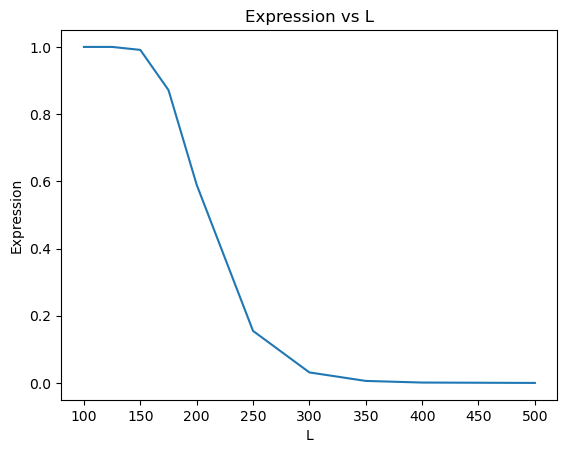

In [2]:
import numpy as np

# Define the variables
M = 1000
L_att = 15

# Define the function
def calculate_expression(L):
    single_succ = 1 - (1 - (0.7) * np.exp(-L / (2*L_att))) ** M
    all_failed = (1 - single_succ) ** 1
    # return 1 - (1 - (1/1) * np.exp(-L / L_att)) ** M
    return 1 - all_failed

def calculate_expression2(L):
    single_succ = 1 - (1 - (0.7) * np.exp(-L / L_att))  * M
    all_failed = (1 - single_succ) ** 1
    # return 1 - (1 - (1/1) * np.exp(-L / L_att)) ** M
    return 1 - all_failed

# Calculate the value for a specific L
L = 200  # Example value for L, change as needed
result = calculate_expression(L)

# Print the result
print(f"The result for L = {L} is: {result}")

# plot a figure with L = [100, 200, 300, 400, 500]
import matplotlib.pyplot as plt
Ls = [100, 125, 150, 175, 200, 250, 300, 350, 400, 500]
res = []
res2 = []
for L in Ls:
    res.append(calculate_expression(L))
    res2.append(calculate_expression2(L))
    print (f"The result for L = {L} is: {res[-1]}")

data_labels = [r for r in res]
plt.plot(Ls, res)
# plt.plot(Ls, res2)
plt.xlabel('L')
plt.ylabel('Expression')
plt.title('Expression vs L')
plt.show()


In [ ]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from endnodes_gen import endnode_graph_gen, endnode_graph_gen_different_map_size

map_size = [500, 1500, 2000, 2500]
topo_idx = range(10)

for size in map_size:
    endnode_graph_gen_different_map_size(100, 0, size)
    file_name = f"endnodesLocs-{size}-100-0.json"
    with open(f"../dist/endnodes/{file_name}", 'r') as f:
        endnodes_graph = json.load(f)
        nodes = endnodes_graph['nodes']

    G = nx.Graph()
    for node in nodes:
        if node['type'] == 'endnode':
            pos = node['pos']
            num_qubits = node['num_qubits']
            G.add_node(node['id'], pos=pos, num_qubits=num_qubits, type='end_node', xcoord=pos[0], ycoord=pos[1])
    endnodes = [node for node in G.nodes if G.nodes[node]['type'] == 'end_node']

    grid_G_node_mappling = {}
    grid_size = 15
    step_size = size / grid_size
    grid = nx.grid_2d_graph(grid_size, grid_size)
    intersection_points = []
    for node in grid.nodes:
        x = (node[0] + 0.5) * step_size
        y = (node[1] + 0.5) * step_size
        intersection_points.append((x, y))

    for node, pos in zip(grid.nodes, intersection_points):
        grid.nodes[node]['pos'] = pos
        grid.nodes[node]['xcoord'] = pos[0]
        grid.nodes[node]['ycoord'] = pos[1]
        grid.nodes[node]['type'] = 'repeater'

    grid_G_node_mappling = {}
    id_r = len(endnodes)
    for node, pos in zip(grid.nodes, intersection_points):
        grid_G_node_mappling[node] = id_r
        G.add_node(id_r, pos=pos, type='repeater', xcoord=pos[0], ycoord=pos[1])
        id_r += 1

    for edges in grid.edges:
        dis = ((grid.nodes[edges[0]]['pos'][0] - grid.nodes[edges[1]]['pos'][0]) ** 2 + (
                grid.nodes[edges[0]]['pos'][1] - grid.nodes[edges[1]]['pos'][1]) ** 2) ** 0.5
        G.add_edge(grid_G_node_mappling[edges[0]], grid_G_node_mappling[

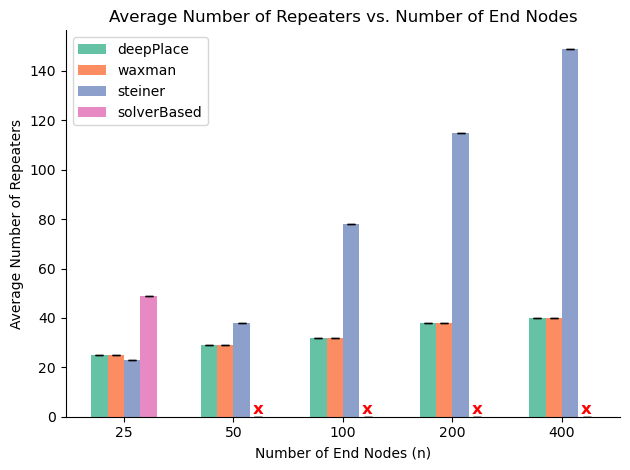

In [3]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman", "steiner", "solverBased"]
n_values = [25, 50, 100, 200, 400]
topo_indices = range(1)
dir_path = "../dist/topos/"
# 初始化存储结果的字典
results = {name: {n: [] for n in n_values} for name in names}

# 读取 JSON 文件并提取 repeater 节点的数量
for name in names:
    for n in n_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{n}-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    repeater_count = sum(1 for _, attr in G.nodes(data=True) if attr.get('type') == 'repeater')
                    results[name][n].append(repeater_count)

# 计算平均值和误差条
averages = {name: [] for name in names}
errors = {name: [] for name in names}

for name in names:
    for n in n_values:
        values = results[name][n]
        if values:
            avg = np.mean(values)
            err = np.ptp(values)  # ptp (peak-to-peak) 计算最大值和最小值的差
            averages[name].append(avg)
            errors[name].append(err)
        else:
            averages[name].append(0)
            errors[name].append(0)

# 使用 seaborn 调色板
colors = sns.color_palette("Set2", len(names))

# 绘制柱状图和误差条
fig, ax = plt.subplots()

bar_width = 0.15
index = np.arange(len(n_values))

for i, (name, color) in enumerate(zip(names, colors)):
    bars = ax.bar(index + i * bar_width, averages[name], bar_width, yerr=errors[name], label=name, color=color, 
                  capsize=3, error_kw=dict(elinewidth=1, capthick=1))

    # 添加红色叉号 "x" 表示没有数据的位置
    for j, avg in enumerate(averages[name]):
        if avg == 0:
            ax.text(index[j] + i * bar_width, 0, 'x', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')

ax.set_xlabel('Number of End Nodes (n)')
ax.set_ylabel('Average Number of Repeaters')
ax.set_title('Average Number of Repeaters vs. Number of End Nodes')
ax.set_xticks(index + bar_width * (len(names) - 1) / 2)
ax.set_xticklabels(n_values)
ax.legend()

# 优化图形显示效果

sns.despine()
plt.tight_layout()
save_path = "../dist/"
plt.savefig(save_path + "fig-n_vs_rptr_num.pdf", transparent=True)
plt.show()


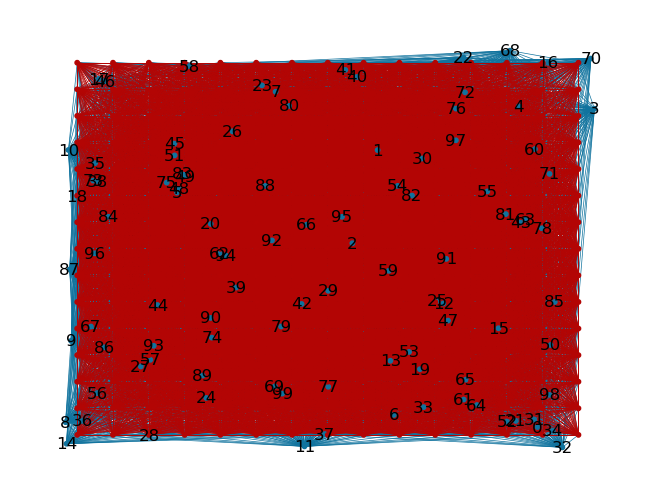

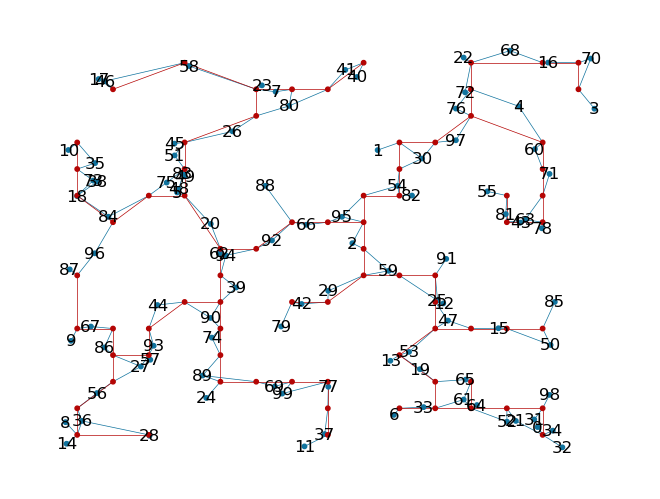

Repeater node number:  78


In [1]:
from grid_steiner import construct_steiner_tree

endnode_file_name = "/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-100-0.json"

construct_steiner_tree(endnode_file_name)

/tmp/ipykernel_2757838/4164501782.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(range(0, 17, 2), fontsize=36)


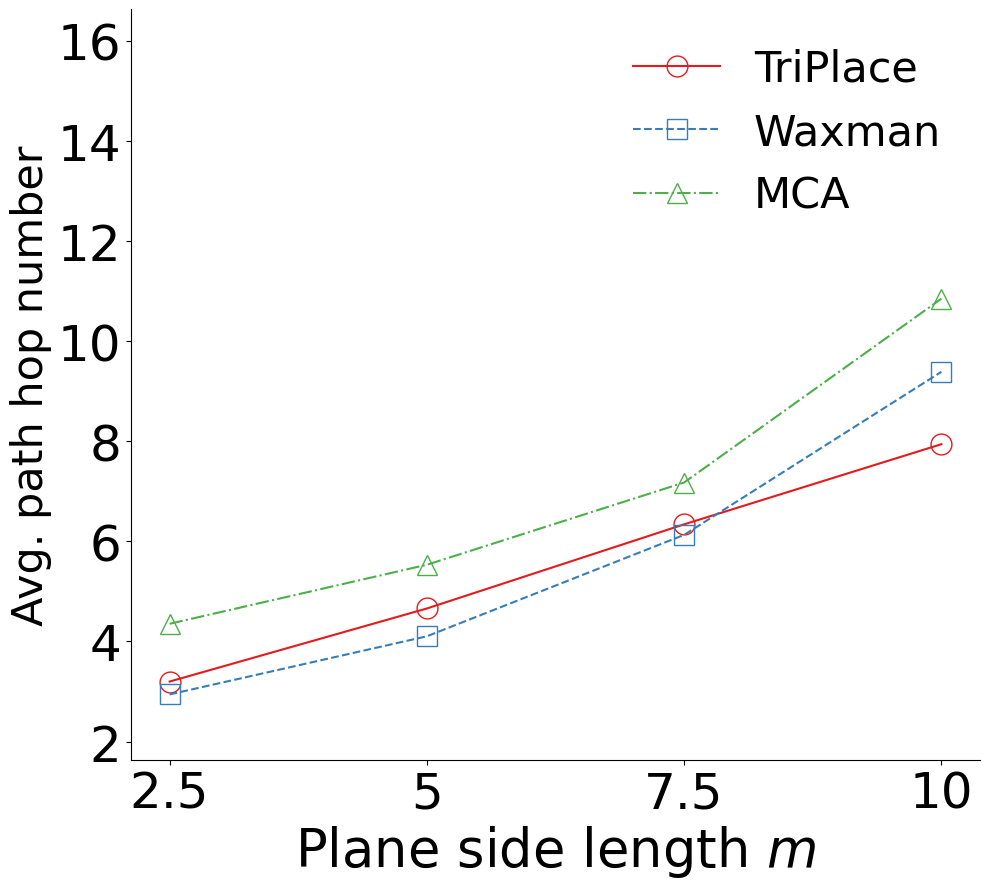

In [4]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations, islice

# 定义名称、节点数量和拓扑索引
names = ["deepPlace", "waxman", "mca"]
map_size_values = [2.5, 5, 7.5, 10]
map_size_values_mapping = {2.5: 500, 5: 1000, 7.5: 1500, 10: 2000}
topo_indices = range(10)
dir_path = "../dist/topos/map_size/"
# 存储所有跳数数据
path_lengths = {name: {n: [] for n in map_size_values} for name in names}

# 读取 JSON 文件并提取跳数数据
for name in names:
    for n in map_size_values:
        for topo_idx in topo_indices:
            filename = dir_path + f"{name}-{map_size_values_mapping[n]}-100-{topo_idx}.json"
            if os.path.exists(filename):
                with open(filename, 'r') as f:
                    data = json.load(f)
                    G = nx.node_link_graph(data)
                    endnodes = [node for node, attr in G.nodes(data=True) if attr.get('type') == 'endnode']
                    for u, v in combinations(endnodes, 2):
                        try:
                            lengths = list(islice(nx.shortest_simple_paths(G, u, v), 3))
                            if len(lengths) > 0:
                                path_lengths[name][n].append(len(lengths[0]) - 1)
                        except nx.NetworkXNoPath:
                            pass

# 计算平均值和误差条
averages = {name: [] for name in names}
errors = {name: [] for name in names}

for name in names:
    for n in map_size_values:
        values = path_lengths[name][n]
        if values:
            avg = np.mean(values)
            err = np.std(values)
            averages[name].append(avg)
            errors[name].append(err)
        else:
            averages[name].append(0)
            errors[name].append(0)

# 使用 seaborn 调色板
colors = sns.color_palette("Set1", len(names))
markers = ['o', 's', '^', 'd']
line_styles = ['-', '--', '-.', ':']

# 绘制折线图和误差条
fig, ax = plt.subplots(figsize=(10, 9))

for i, (name, color, marker, line_style) in enumerate(zip(names, colors, markers, line_styles)):
    ax.errorbar(map_size_values, averages[name], yerr=errors[name], label=name, color=color, capsize=0, fmt=f'{line_style}{marker}', 
                markersize=15, elinewidth=0, capthick=0, markerfacecolor='none', markeredgecolor=color)

ax.set_xlabel('Plane side length $m$', fontsize=38)
ax.set_ylabel('Avg. path hop number', fontsize=31)
ax.set_xticks(map_size_values)
ax.set_xticklabels(map_size_values, fontsize=36)
ax.set_yticklabels(range(0, 17, 2), fontsize=36)
ax.legend(fontsize=36)

# 调整其他文本元素的字体大小
# ax.tick_params(axis='both', which='major', labelsize=36)
lengendMapping = {
    "deepPlace": "TriPlace",
    "waxman": "Waxman",
    "solverBased": "SolverBased",
    "mca": "MCA"
}

ax.legend(loc='best', fontsize=31, labels=[lengendMapping[name] for name in names], frameon=False)


# 优化图形显示效果
sns.despine()
plt.tight_layout()
save_path = "../dist/figs/"
plt.savefig(save_path + "fig-hop_vs_map.pdf", transparent=True)
plt.show()
